In [ ]:
import os
import torch
import torchvision
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
import segmentation_models_pytorch as smp
import numpy as np
import pandas as pd

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import tifffile
import os
from patchify import patchify  #Only to handle large images
import random
from scipy import ndimage

In [ ]:
def load_images_as_numpy(folder_path, limit=None):
    image_list = []
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path)
            img = img.resize((256,256))
            img = img.convert("RGB")
            img_array = np.array(img)
            image_list.append(img_array)
            count += 1
            if limit is not None and count >= limit:
                break
    return np.stack(image_list)


frames_folder = r'D:\SEM_3\DL\Project\Data_set_New\Data_set\data_images'
masks_folder = r'D:\SEM_3\DL\Project\Data_set_New\Data_set\annotated_images'
limit = 127
frames_array = load_images_as_numpy(frames_folder, limit=limit)
masks_array = load_images_as_numpy(masks_folder, limit=limit)

print("Frames shape:", frames_array.shape)
print("Masks shape:", masks_array.shape)

Frames shape: (127, 256, 256, 3)
Masks shape: (127, 256, 256, 3)


In [ ]:
def process_masks(masks_array):
    averaged_array = np.mean(masks_array, axis=-1, keepdims=True)
    new_masks_array = np.where(averaged_array > 0, 1, 0)
    return new_masks_array

processed_masks = process_masks(masks_array)

In [ ]:
processed_masks.shape

(127, 256, 256, 1)

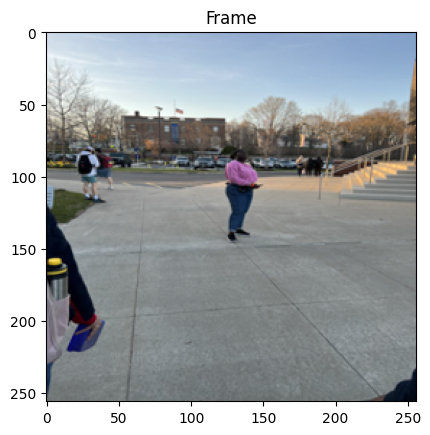

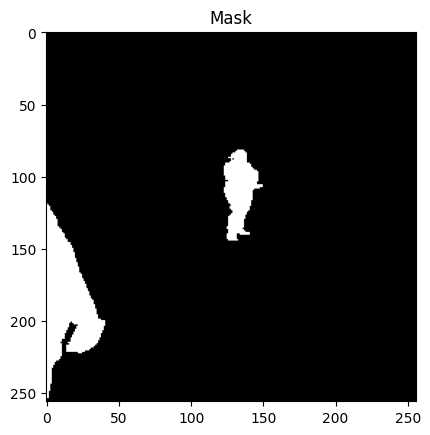

In [ ]:
index_to_visualize = 0

plt.imshow(frames_array[index_to_visualize])
plt.title('Frame')
plt.show()

#
plt.imshow(processed_masks[index_to_visualize] ,cmap='gray')
plt.title('Mask')
plt.show()

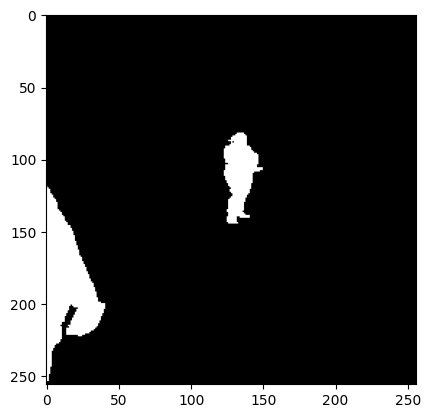

In [ ]:
plt.imshow(processed_masks[index_to_visualize] ,cmap='gray')

In [ ]:
def process_masks2(masks_array):
    new_masks_array = np.where(masks_array > 0, 1, 0)
    return new_masks_array

masks = process_masks2(masks_array)

In [ ]:
img_req = masks*frames_array[index_to_visualize]

In [ ]:
img_req.shape

(127, 256, 256, 3)

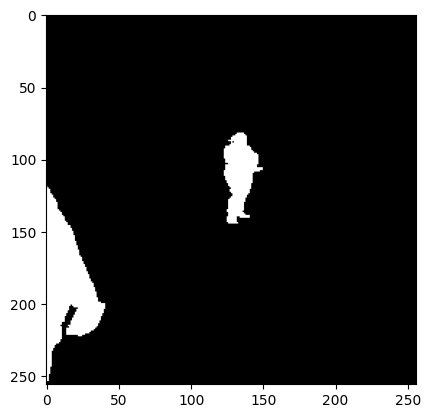

In [ ]:
plt.imshow(processed_masks[0], cmap ='gray')

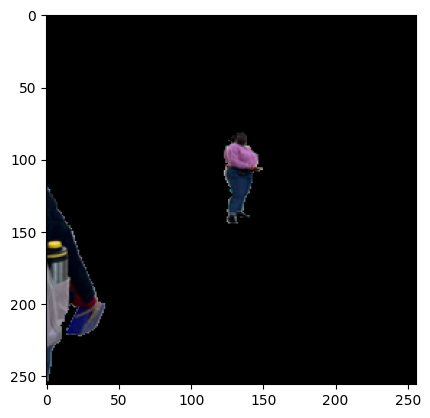

In [ ]:
plt.imshow(img_req[index_to_visualize])
plt.show()

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

from segmentation_models_pytorch import Unet
import segmentation_models_pytorch as smp

# Assuming frames_array and masks_array are your data
# frames_array and masks_array have shapes (500, 512, 512, 3)

# Convert frames_array and masks_array to PyTorch tensors
frames_tensor = torch.tensor(frames_array, dtype=torch.float32).permute(0, 3, 1, 2)  # Assuming channels are in the last dimension
masks_tensor = torch.tensor(processed_masks, dtype=torch.float32).permute(0, 3, 1, 2)

# Normalize frames_tensor (optional but recommended)
frames_tensor /= 255.0

# Create a custom dataset
dataset = TensorDataset(frames_tensor, masks_tensor)

# Perform train-test split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoader for training set and testing set
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the UNet model


In [ ]:
from tqdm import tqdm

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

Epoch [1/20] - Train Loss: 0.3667192504956172


  5%|████▏                                                                              | 1/20 [00:26<08:28, 26.79s/it]

Epoch [1/20] - Test Loss: 7.053482174873352
Epoch [2/20] - Train Loss: 0.23471787571907043


 10%|████████▎                                                                          | 2/20 [00:52<07:50, 26.16s/it]

Epoch [2/20] - Test Loss: 0.21743758395314217
Epoch [3/20] - Train Loss: 0.16809059049074465


 15%|████████████▍                                                                      | 3/20 [01:18<07:23, 26.07s/it]

Epoch [3/20] - Test Loss: 0.30680760741233826
Epoch [4/20] - Train Loss: 0.12921399221970484


 20%|████████████████▌                                                                  | 4/20 [01:45<07:02, 26.42s/it]

Epoch [4/20] - Test Loss: 0.1172991581261158
Epoch [5/20] - Train Loss: 0.1266723991586612


 25%|████████████████████▊                                                              | 5/20 [02:11<06:33, 26.23s/it]

Epoch [5/20] - Test Loss: 0.12016890477389097
Epoch [6/20] - Train Loss: 0.10629401355981827


 30%|████████████████████████▉                                                          | 6/20 [02:37<06:06, 26.21s/it]

Epoch [6/20] - Test Loss: 0.1261650063097477
Epoch [7/20] - Train Loss: 0.08999082904595596


 35%|█████████████████████████████                                                      | 7/20 [03:06<05:53, 27.18s/it]

Epoch [7/20] - Test Loss: 0.10762384533882141
Epoch [8/20] - Train Loss: 0.07239334829724751


 40%|█████████████████████████████████▏                                                 | 8/20 [03:33<05:24, 27.08s/it]

Epoch [8/20] - Test Loss: 0.10206550545990467
Epoch [9/20] - Train Loss: 0.08976266217919496


 45%|█████████████████████████████████████▎                                             | 9/20 [03:59<04:54, 26.75s/it]

Epoch [9/20] - Test Loss: 0.19013442657887936
Epoch [10/20] - Train Loss: 0.10730038525966498


 50%|█████████████████████████████████████████                                         | 10/20 [04:25<04:23, 26.38s/it]

Epoch [10/20] - Test Loss: 0.1707420963793993
Epoch [11/20] - Train Loss: 0.07967171015647742


 55%|█████████████████████████████████████████████                                     | 11/20 [04:50<03:54, 26.10s/it]

Epoch [11/20] - Test Loss: 0.10843658447265625
Epoch [12/20] - Train Loss: 0.07404084962147933


 60%|█████████████████████████████████████████████████▏                                | 12/20 [05:16<03:29, 26.16s/it]

Epoch [12/20] - Test Loss: 0.10470488853752613
Epoch [13/20] - Train Loss: 0.09232975485233161


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [05:42<03:01, 25.87s/it]

Epoch [13/20] - Test Loss: 0.16697506606578827
Epoch [14/20] - Train Loss: 0.09208211331413342


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [06:07<02:34, 25.68s/it]

Epoch [14/20] - Test Loss: 0.15279287286102772
Epoch [15/20] - Train Loss: 0.10237855263627492


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [06:32<02:07, 25.57s/it]

Epoch [15/20] - Test Loss: 0.11404308956116438
Epoch [16/20] - Train Loss: 0.06675328486240827


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [06:58<01:42, 25.54s/it]

Epoch [16/20] - Test Loss: 0.09823783859610558
Epoch [17/20] - Train Loss: 0.05003160123641674


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [07:23<01:16, 25.49s/it]

Epoch [17/20] - Test Loss: 0.10484388191252947
Epoch [18/20] - Train Loss: 0.04113726819363924


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [07:48<00:50, 25.44s/it]

Epoch [18/20] - Test Loss: 0.09459066856652498
Epoch [19/20] - Train Loss: 0.04090252346717394


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [08:14<00:25, 25.45s/it]

Epoch [19/20] - Test Loss: 0.1039524907246232
Epoch [20/20] - Train Loss: 0.0333716687388145


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [08:39<00:00, 25.98s/it]

Epoch [20/20] - Test Loss: 0.09389879368245602


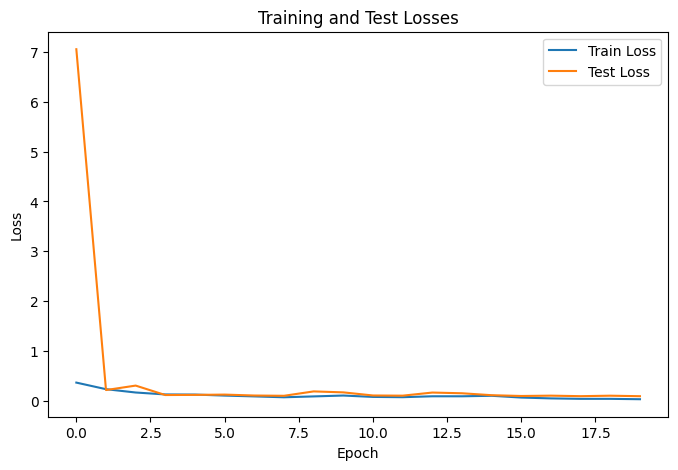

In [ ]:
# Define the UNet model

import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = smp.Unet(encoder_name="resnet34", in_channels=3, classes=1)


criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


num_epochs = 20

model.to(device)

train_losses = []
test_losses = []

for epoch in tqdm(range(num_epochs)):
    model.train()
    epoch_train_losses = []
    for frames, masks in train_loader:
        frames, masks = frames.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, masks)
        epoch_train_losses.append(loss.item())
        loss.backward()
        optimizer.step()


    epoch_train_loss = sum(epoch_train_losses) / len(epoch_train_losses)
    train_losses.append(epoch_train_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {epoch_train_loss}")


    model.eval()
    epoch_test_losses = []
    with torch.no_grad():
        for frames, masks in test_loader:
            frames, masks = frames.to(device), masks.to(device)
            outputs = model(frames)

            test_loss = criterion(outputs, masks)
            epoch_test_losses.append(test_loss.item())


    epoch_test_loss = sum(epoch_test_losses) / len(epoch_test_losses)
    test_losses.append(epoch_test_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Test Loss: {epoch_test_loss}")

# Plotting the losses
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.show()



In [ ]:
#torch.save(model, 'model2.pth');

model = torch.load('model2.pth')


(127, 256, 256, 3)
torch.Size([127, 3, 256, 256])


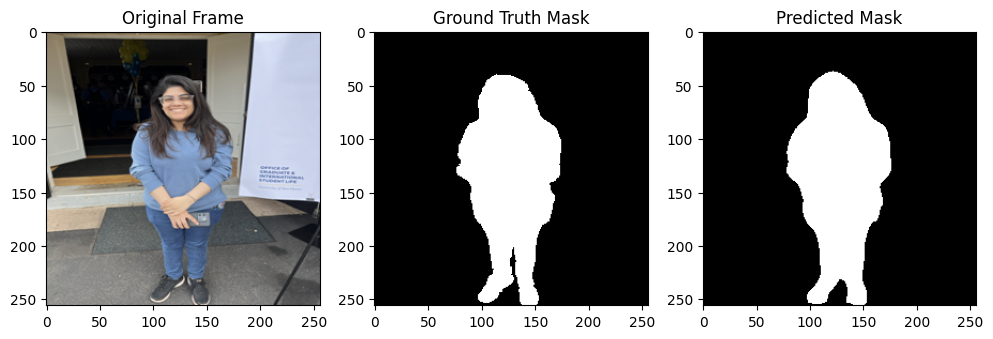

In [ ]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def process_masks2(masks_array):
    new_masks_array = np.where(masks_array > 0, 1, 0)
    return new_masks_array

# Assuming frames_array and masks_array are your test data
# frames_array has shape (batch_size, height, width, channels)
# masks_array has shape (batch_size, height, width, channels)
print(frames_array.shape)
# Convert frames_array to PyTorch tensor
frames_tensor = torch.tensor(frames_array, dtype=torch.float32).permute(0, 3, 1, 2)  # Assuming channels are in the last dimension

# Normalize frames_tensor (optional but recommended)
frames_tensor /= 255.0

# Convert frames_tensor to device
frames_tensor = frames_tensor.to(device)

# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    predictions = model(frames_tensor)
    print(frames_tensor.shape)

# Convert predictions to numpy array
predictions_np = predictions.cpu().numpy()

predictions_np =  process_masks2(predictions_np)



# Assuming predictions_np has shape (batch_size, 1, height, width)

# Plot some example predictions
# num_examples = min(4, frames_tensor.shape[0])  # Adjust the number of examples to plot
# for i in range(num_examples):
plt.figure(figsize=(12, 6))

        # Plot the original frame
plt.subplot(1, 3, 1)
plt.imshow(frames_array[9])
plt.title("Original Frame")

        # Plot the ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(processed_masks[9, ..., 0], cmap="gray")  # Assuming masks are grayscale
plt.title("Ground Truth Mask")

        # Plot the predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predictions_np[9, 0], cmap="gray")
plt.title("Predicted Mask")
plt.show()

Text(0.5, 1.0, 'Predicted Mask')

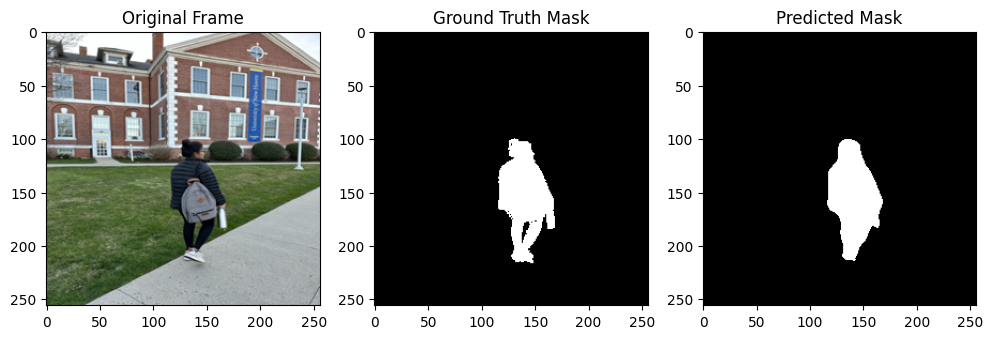

In [ ]:
plt.figure(figsize=(12,6))

        # Plot the original frame
plt.subplot(1, 3, 1)
plt.imshow(frames_array[102])
plt.title("Original Frame")

        # Plot the ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(processed_masks[102, ..., 0], cmap="gray")  # Assuming masks are grayscale
plt.title("Ground Truth Mask")

        # Plot the predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predictions_np[102, 0], cmap="gray")
plt.title("Predicted Mask")
# plt.show()

Text(0.5, 1.0, 'Predicted Mask')

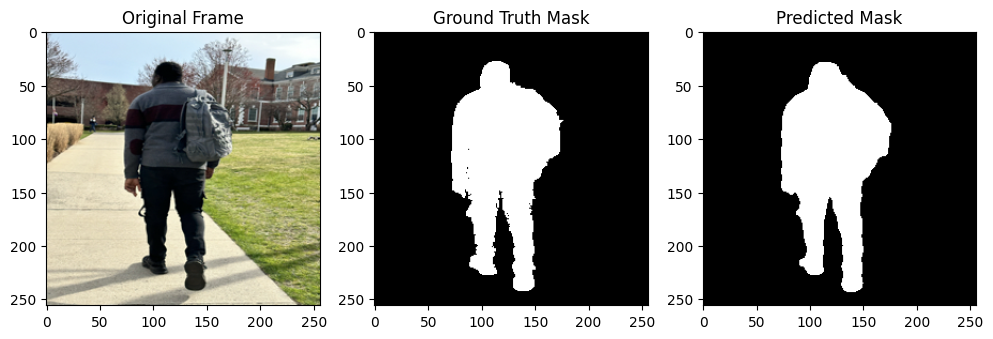

In [ ]:
plt.figure(figsize=(12,6))

        # Plot the original frame
plt.subplot(1, 3, 1)
plt.imshow(frames_array[112])
plt.title("Original Frame")

        # Plot the ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(processed_masks[112, ..., 0], cmap="gray")  # Assuming masks are grayscale
plt.title("Ground Truth Mask")

        # Plot the predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predictions_np[112, 0], cmap="gray")
plt.title("Predicted Mask")
# plt.show()

In [ ]:
# import numpy as np

def dice_coefficient(predictions, targets):
    intersection = np.sum(predictions * targets)
    union = np.sum(predictions) + np.sum(targets)
    return (2.0 * intersection) / (union + intersection + 1e-8)  # Adding a small constant to avoid division by zero


# Threshold predictions (assuming binary masks with values between 0 and 1)
threshold = 0.5
binary_predictions = (predictions_np > threshold).astype(np.float32)

# Calculate Dice scores for each pair of masks
dice_scores = []
for i in range(binary_predictions.shape[0]):
    for channel in range(masks_array.shape[-1]):
        dice = dice_coefficient(binary_predictions[i, 0, :, :], masks_array[i, :, :, channel])
        dice_scores.append(dice)

# Calculate the average Dice score
average_dice_score = np.mean(dice_scores)
print("Average Dice Score:", average_dice_score)

Average Dice Score: 0.936900710868333


In [ ]:
predictions_np= np.transpose(predictions_np, (0, 2, 3, 1))

In [ ]:
predictions_np.shape

(127, 256, 256, 1)

In [ ]:
frames_array.shape

(127, 256, 256, 3)

In [ ]:
final_predictions = predictions_np * frames_array


In [ ]:
i

126

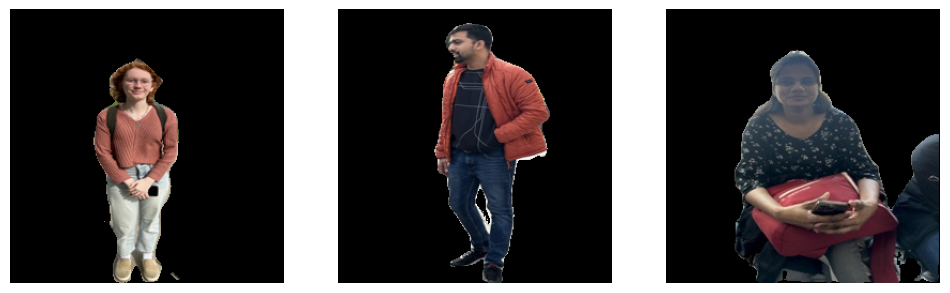

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
# plt.title("final prediction 1")
plt.imshow(final_predictions[12])
plt.axis('off')
plt.subplot(1, 3, 2)
# plt.title("final prediction 2")
plt.imshow(final_predictions[57])
plt.axis('off')
plt.subplot(1, 3, 3)
# plt.title("final prediction 3")
plt.imshow(final_predictions[119])
plt.axis('off')
plt.show()

In [ ]:
def CustomCrop(path):
    img = Image.open(path)
    img = img.resize((256,256))
    img = img.convert("RGB")
    frame_array = np.array(img)
    frame = frame_array
    frame_array =  frame_array [np.newaxis, ...]
    frame_tensor = torch.tensor(frame_array, dtype=torch.float32).permute(0, 3, 1, 2)
    frame_tensor /= 255.0
    model.eval()

    with torch.no_grad():
        prediction = model(frame_tensor)

    prediction = prediction.cpu().numpy()
    prediction = process_masks2(prediction)
    prediction = np.squeeze(prediction)
    prediction = np.expand_dims(prediction , axis=-1)
    prediction = prediction * frame
    plt.figure(figsize=(16,8))
    plt.subplot(1, 3, 1)
    plt.imshow(frame)
    plt.title("Original Frame")

        # Plot the ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(prediction)
    plt.title("Mask")
    print(prediction.shape)

#     im = Image.fromarray(prediction)
#     im.save("your_file.png")

    image = prediction.astype(np.uint8)
    #image = np.squeeze(image)
    image = Image.fromarray(image)
    image.save("output_image.png")


(256, 256, 3)


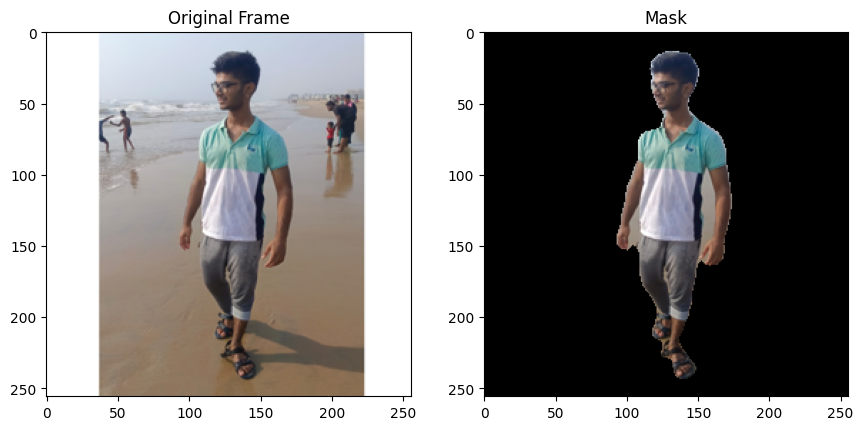

In [ ]:
CustomCrop("test.jpeg")